In [47]:
import utils
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Préparation des données

In [146]:
players_info_list = utils.get_dataframes_csv_file('../data/players_infos')
players_stats_list = utils.get_dataframes_csv_file('../data/players_stats')

In [147]:
# Trier les données en fonction des années 
players_info_list.sort(key=lambda df: df['Title'][0].split('-')[0][-4:])
players_stats_list.sort(key=lambda df: df['Title'][0].split('-')[0][-4:])

In [148]:
# Selectionner depuis l'année 1980 pour les statistiques en raison du manques de statistiques avant les années 80s
players_stats_list = players_stats_list[68::]

In [154]:
import numbers

def is_numeric(value):
    return isinstance(value, numbers.Number)

i=0
for df in players_stats_list:
    numeric_cols = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
    
    for col in numeric_cols:
        for value in df[col]:
            if not is_numeric(value):
                i+=1
i

0

In [140]:
import numbers

def is_numeric(value):
    return isinstance(value, numbers.Number)

i=0
for df in players_stats_list:
    numeric_cols = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']
    
    for col in numeric_cols:
        for value in df[col]:
            if not is_numeric(value):
                i+=1

print(i)

20408


In [155]:
# Diviser les données des stats des joueurs en fonctions du type de saison 
players_stats_list_summer_league = []
players_stats_list_playoffs = []
players_stats_list_regular_season = []
players_stats_list_preseason = []

for df in players_stats_list:
    year = df['Title'].iloc[0].split(' ')[1]

    if year == '2023-2024':
        continue

    season_type = df['Title'].iloc[0].split(' ')[2]
    
    # Ajouter les données au dictionnaire approprié
    if season_type == 'Playoffs':
        players_stats_list_playoffs.append(df)
    elif season_type == 'Regular_Season':
        players_stats_list_regular_season.append(df)
    elif season_type == 'Preseason':
        players_stats_list_preseason.append(df)

In [156]:
# Combiner les DataFrames en un seul pour chaque liste
players_info = pd.concat(players_info_list)
players_stats = pd.concat(players_stats_list_regular_season)

# Conversion de la colonne 'Title' pour extraire l'année de la saison
players_info['Season'] = players_info['Title'].apply(lambda x: x.split()[1])
players_stats['Season'] = players_stats['Title'].apply(lambda x: x.split()[1])

# Suppression des colonnes 'Title' après extraction de la saison
players_info.drop(columns=['Title'], inplace=True)
players_stats.drop(columns=['Title'], inplace=True)

# Jointure des DataFrames sur le nom des joueurs et la saison
merged_data = pd.merge(players_info, players_stats, on=['Player', 'Season', 'GP'], how='inner')

# Players infos

In [41]:
# Résumé statistique global pour les informations des joueurs
player_info_stats = merged_data[['HT', 'WT', 'GP']].describe().transpose()
player_info_stats_df = player_info_stats[['mean', '50%', 'std', 'min', 'max']]
player_info_stats_df.columns = ['Mean', 'Median', 'StdDev', 'Min', 'Max']
display(player_info_stats_df)

,Mean,Median,StdDev,Min,Max
HT,2.003504,2.006600,0.092664,1.600200,2.311400
WT,98.637015,98.883137,12.498294,60.327785,161.025291
GP,53.444178,61.000000,25.339353,1.000000,85.000000


In [42]:
# Résumé statistique par saison pour les informations des joueurs
seasonal_info_summary = merged_data.groupby('Season')[['HT', 'WT', 'GP']].describe().transpose()
print("Résumé statistique par saison pour les informations des joueurs:")
print(seasonal_info_summary)

Résumé statistique par saison pour les informations des joueurs:
Season     1980-1981   1981-1982   1982-1983   1983-1984   1984-1985  \
HT count  265.000000  298.000000  268.000000  270.000000  304.000000   
   mean     1.992414    1.994411    2.000250    2.000956    2.000166   
   std      0.089384    0.084620    0.089678    0.089457    0.088945   
   min      1.727200    1.727200    1.727200    1.727200    1.727200   
   25%      1.930400    1.930400    1.930400    1.930400    1.930400   
   50%      2.006600    2.006600    2.006600    2.006600    2.006600   
   75%      2.057400    2.057400    2.057400    2.057400    2.057400   
   max      2.184400    2.184400    2.260600    2.235200    2.260600   
WT count  265.000000  297.000000  268.000000  270.000000  304.000000   
   mean    92.529420   92.664187   93.348633   93.675224   93.869747   
   std     10.168801   10.121542   10.573203   10.677278   10.468626   
   min     68.038855   68.038855   68.038855   68.038855   72.574779   

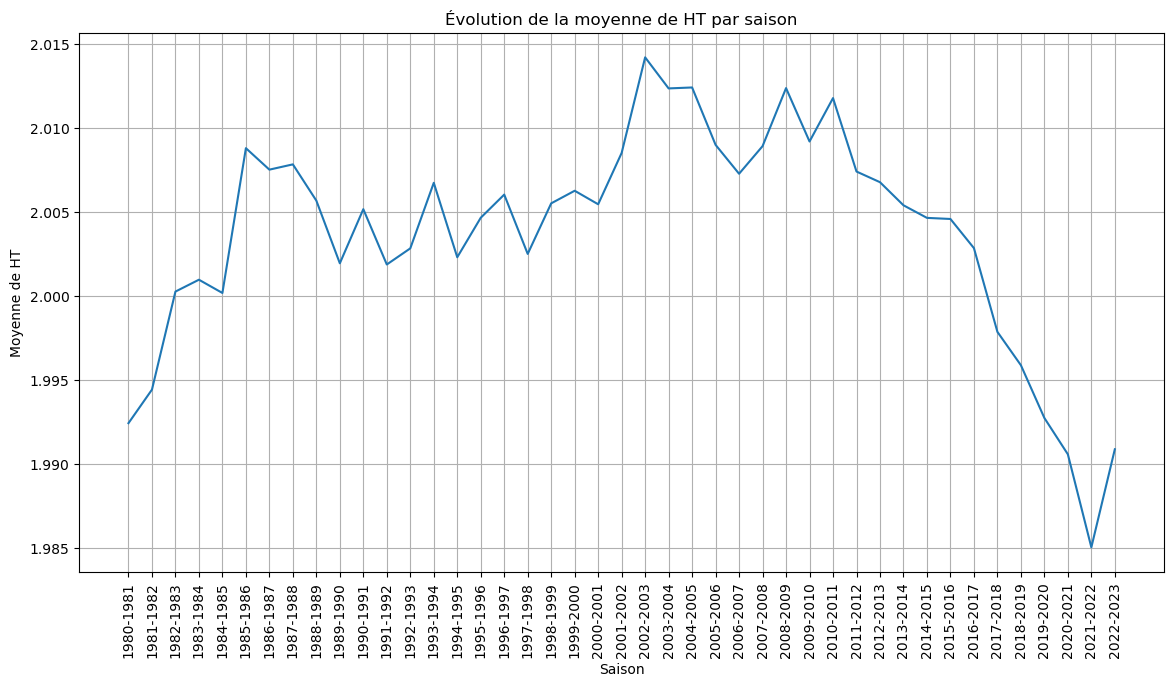

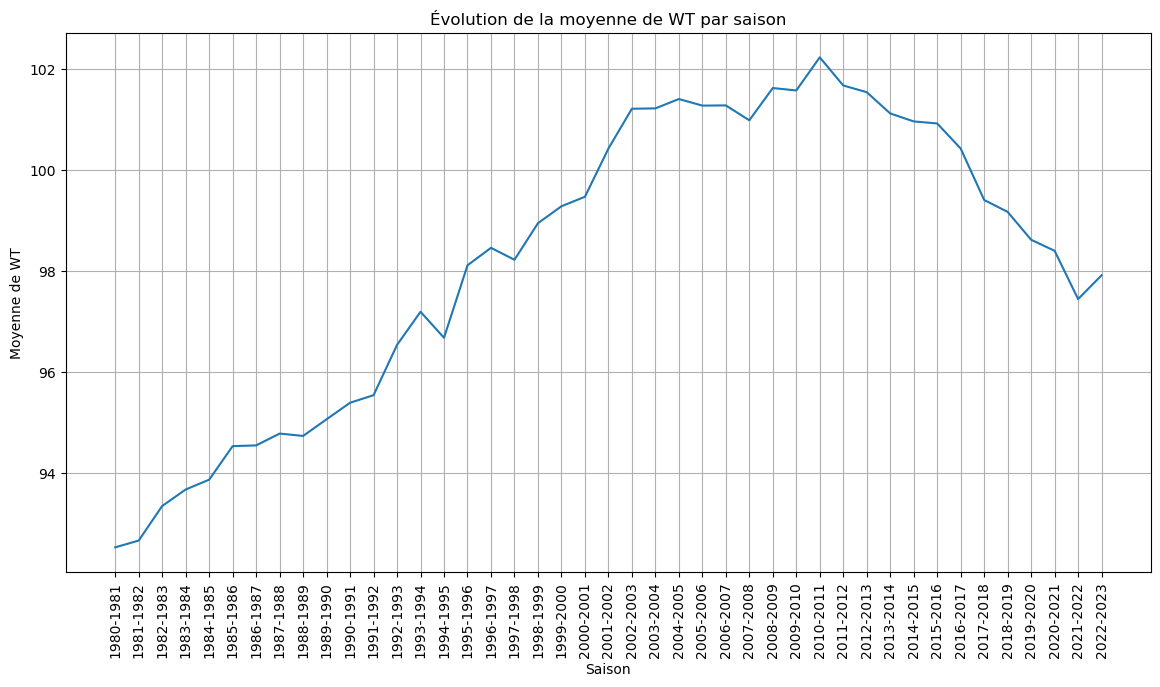

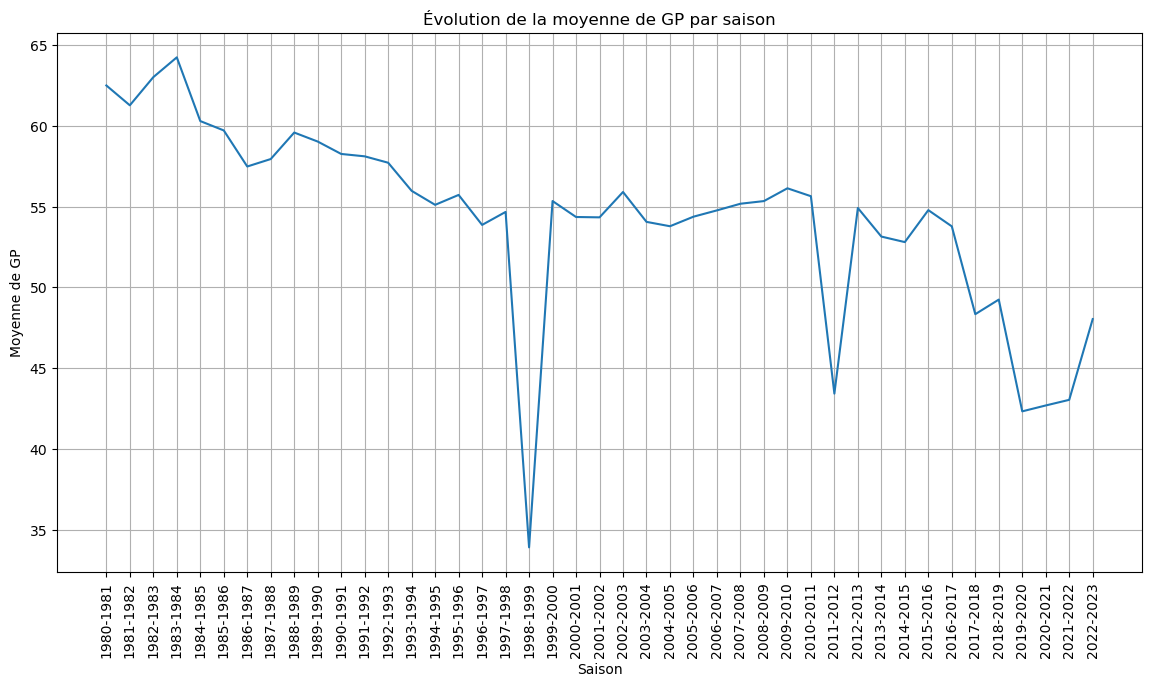

In [43]:
# Affichage des évolutions temporelles des informations des joueurs
info_stats_to_plot = ['HT', 'WT', 'GP']

for stat in info_stats_to_plot:
    seasonal_mean_info = merged_data.groupby('Season')[stat].mean()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=seasonal_mean_info)
    plt.title(f"Évolution de la moyenne de {stat} par saison")
    plt.xlabel("Saison")
    plt.ylabel(f"Moyenne de {stat}")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

# Players statistics

In [113]:
# Résumé statistique global pour les statistiques de jeu des joueurs
player_game_stats = merged_data[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']].describe().transpose()
player_game_stats_df = player_game_stats[['mean', '50%', 'std', 'min', 'max']]
player_game_stats_df.columns = ['Mean', 'Median', 'StdDev', 'Min', 'Max']
display(player_game_stats_df)


,Mean,Median,StdDev,Min,Max
GP,53.444178,61.0000,25.339353,1.0,85.0
FGM,203.426017,157.0000,183.705889,0.0,993.0
FG%,0.441767,0.4460,0.097355,0.0,1.0
3PM,30.059684,5.0000,46.000488,0.0,402.0
3PA,85.113059,22.0000,121.625641,0.0,886.0
3P%,0.224068,0.2765,0.180027,0.0,1.0
FTM,100.820566,64.0000,109.901887,0.0,833.0
FTA,133.315996,88.0000,139.775287,0.0,972.0
FT%,0.703588,0.7490,0.189939,0.0,1.0
ORB,63.512677,40.0000,66.466972,0.0,558.0


In [114]:
# Résumé statistique par saison pour les statistiques de jeu des joueurs
seasonal_game_summary = merged_data.groupby('Season')[['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']].describe().transpose()
print("Résumé statistique par saison pour les statistiques de jeu des joueurs:")
print(seasonal_game_summary)

Résumé statistique par saison pour les statistiques de jeu des joueurs:
Season     1980-1981   1981-1982   1982-1983   1983-1984   1984-1985  \
GP count  266.000000  298.000000  268.000000  270.000000  304.000000   
   mean    62.503759   61.275168   63.018657   64.244444   60.299342   
   std     24.952521   24.576099   23.752698   23.440335   24.755155   
   min      1.000000    1.000000    3.000000    1.000000    1.000000   
   25%     51.250000   48.250000   51.750000   57.250000   47.000000   
...              ...         ...         ...         ...         ...   
PF min      0.000000    1.000000    0.000000    0.000000    0.000000   
   25%     90.500000   83.000000   93.750000   85.500000   78.750000   
   50%    175.500000  169.000000  172.000000  179.500000  157.500000   
   75%    235.500000  226.500000  238.250000  234.500000  216.000000   
   max    342.000000  372.000000  379.000000  386.000000  344.000000   

Season     1985-1986   1986-1987   1987-1988   1988-1989   1989

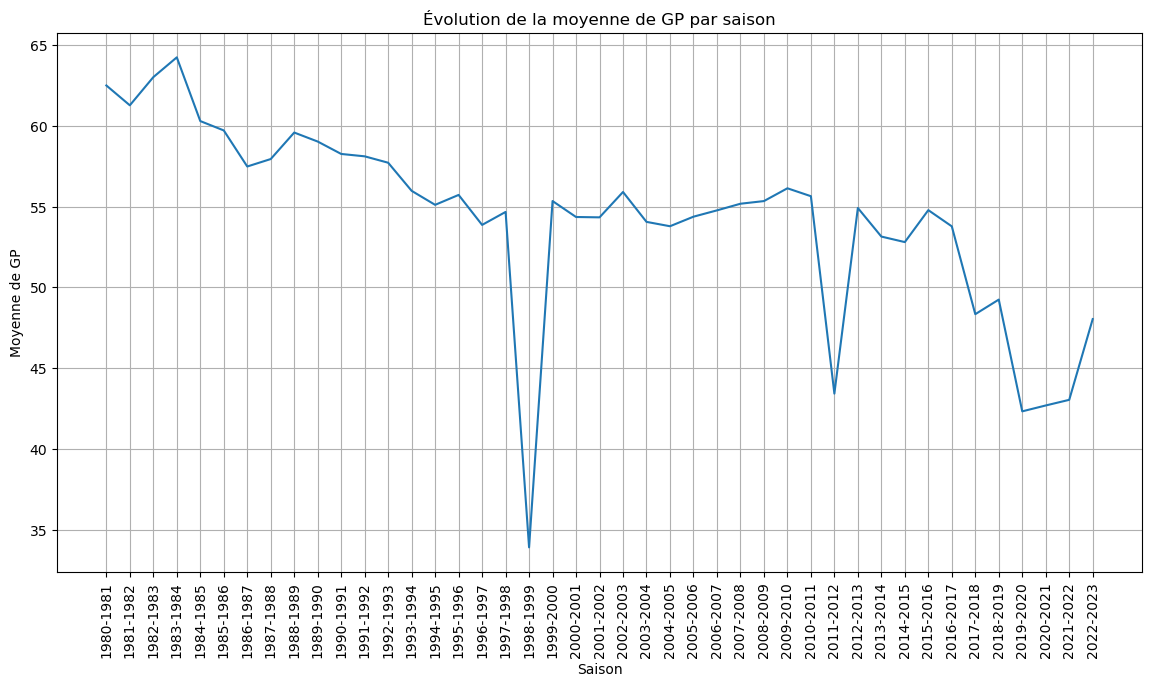

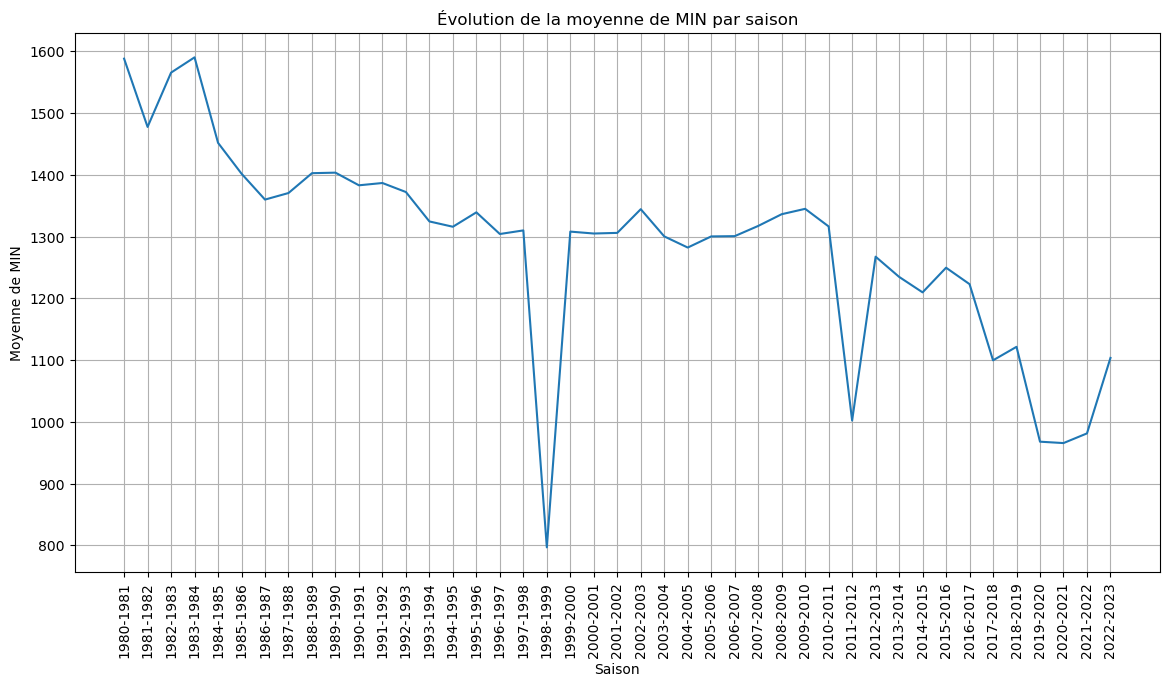

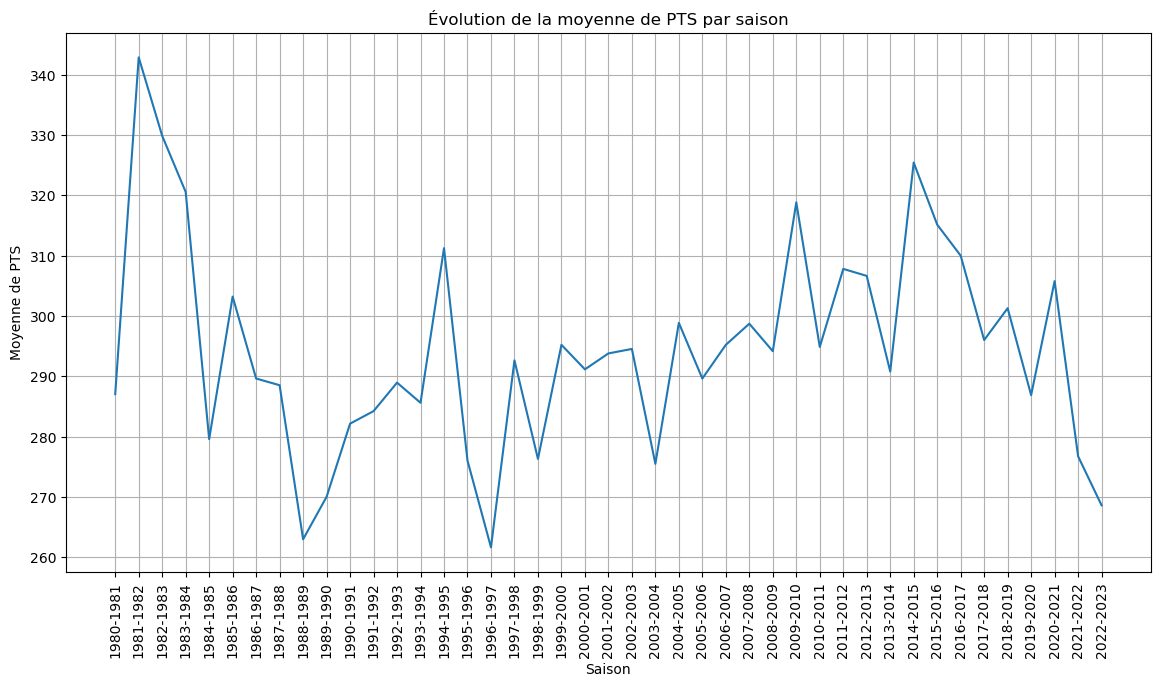

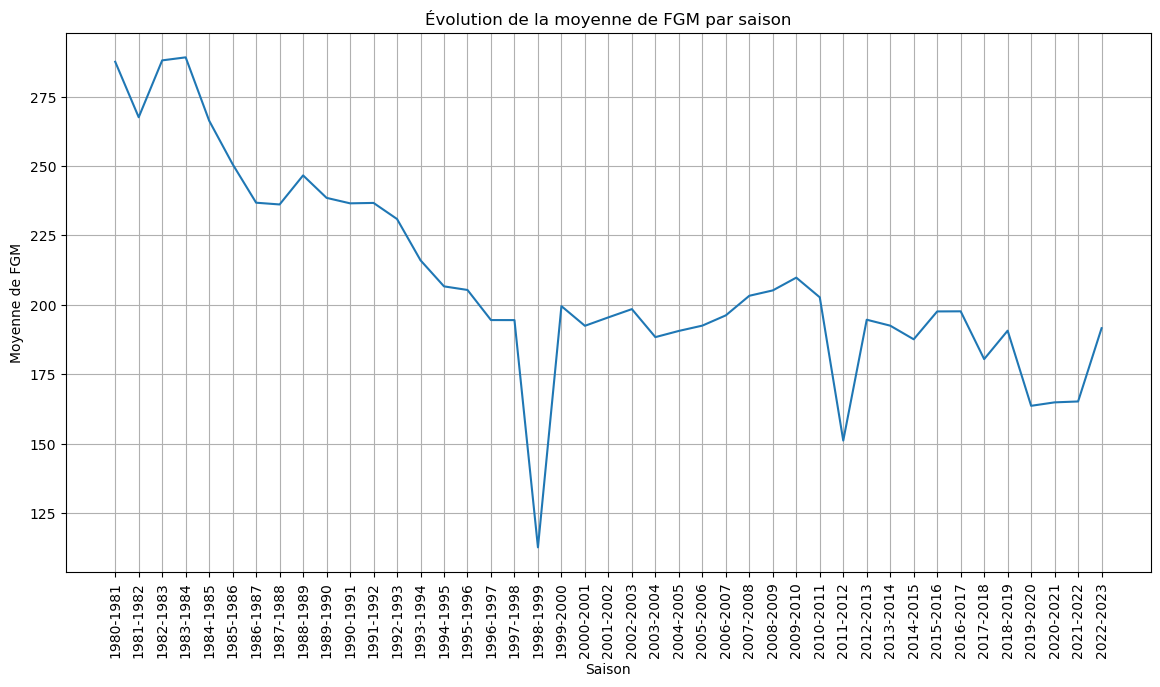

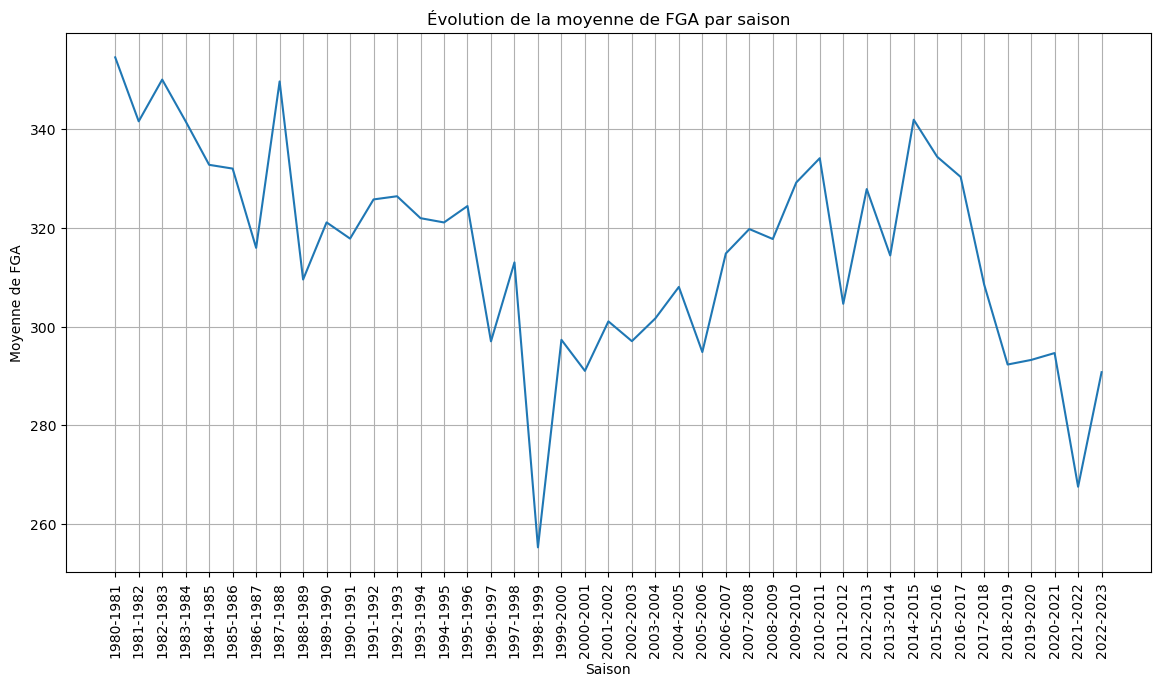

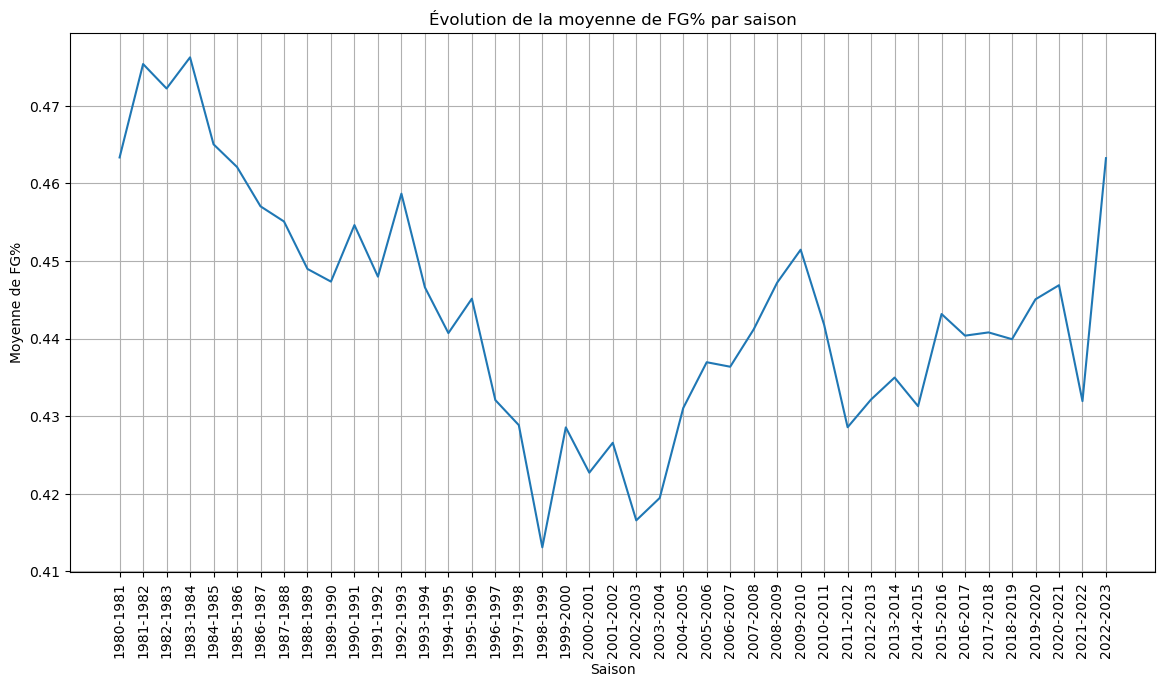

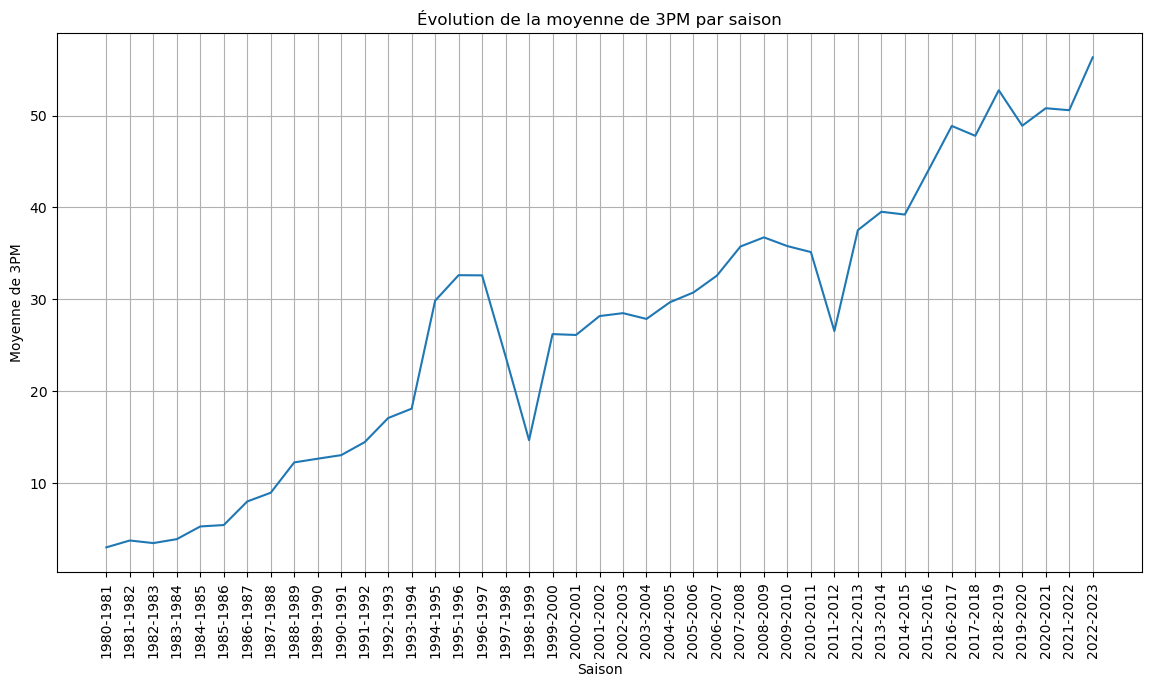

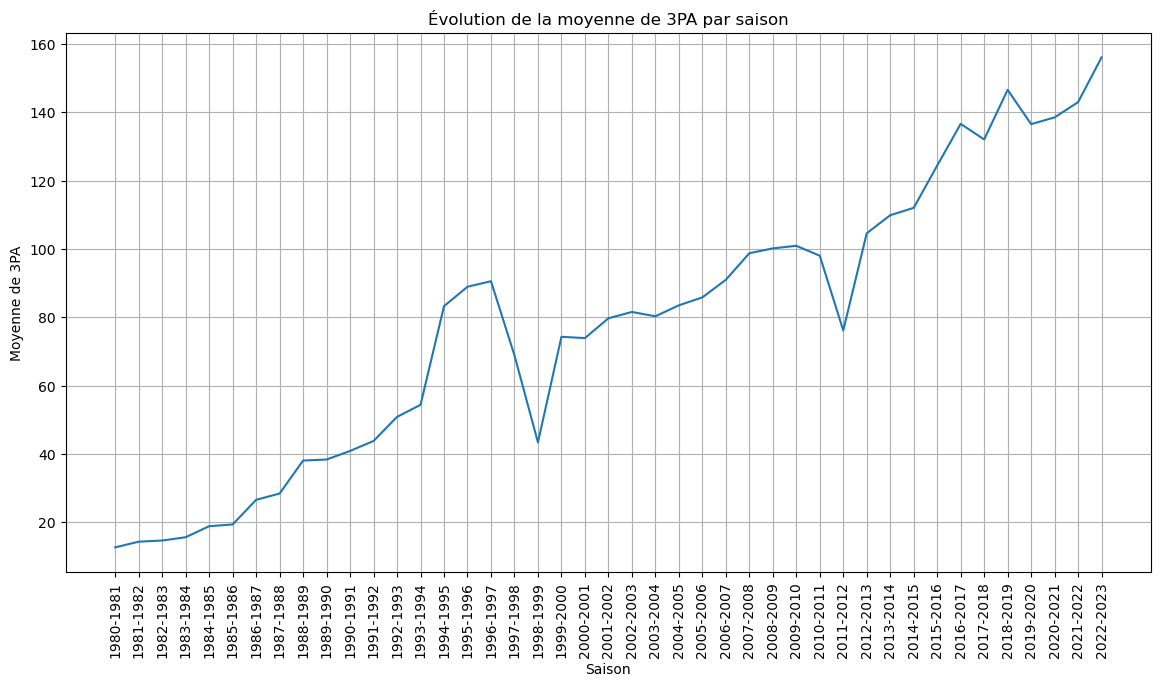

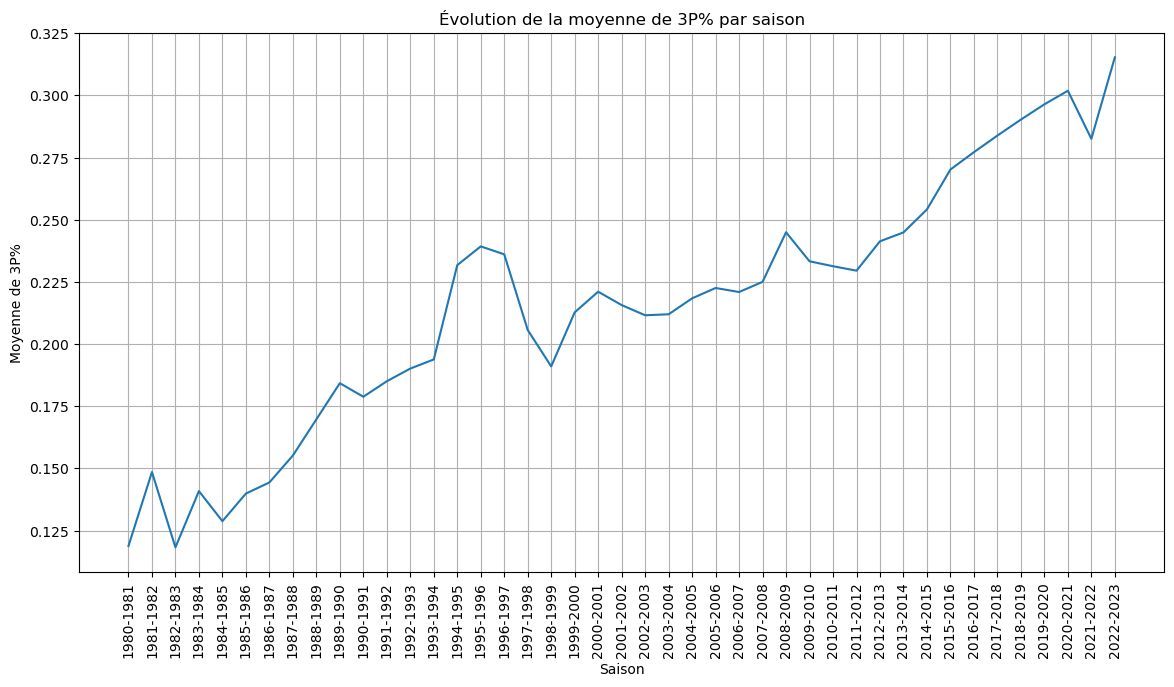

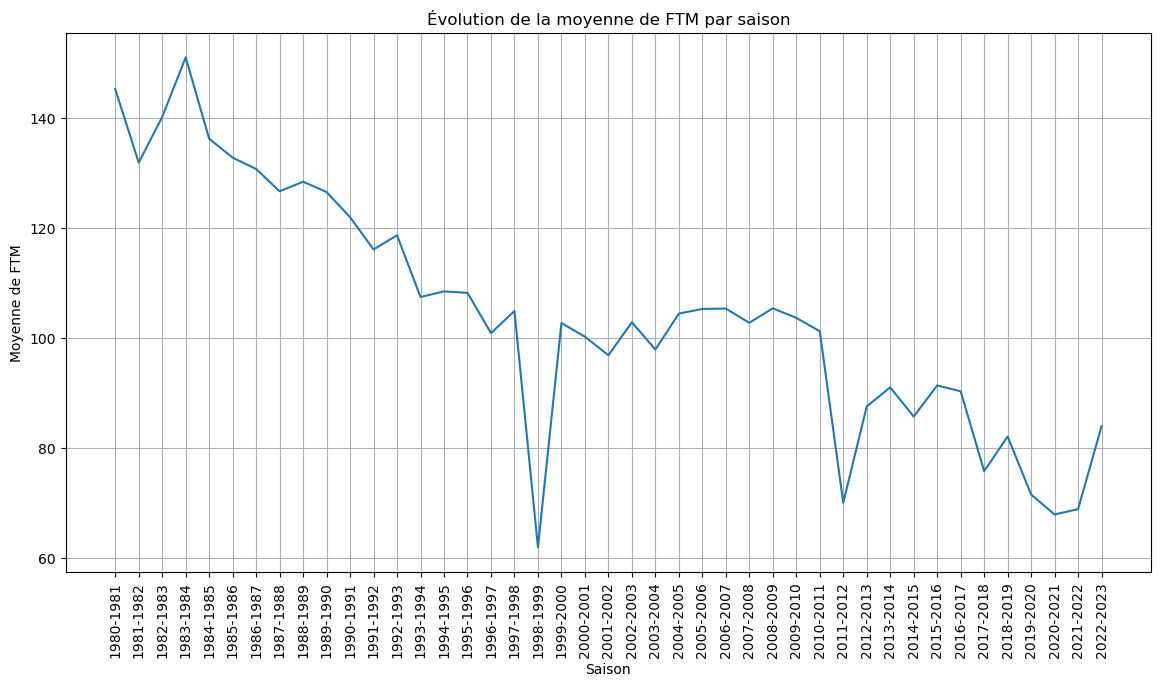

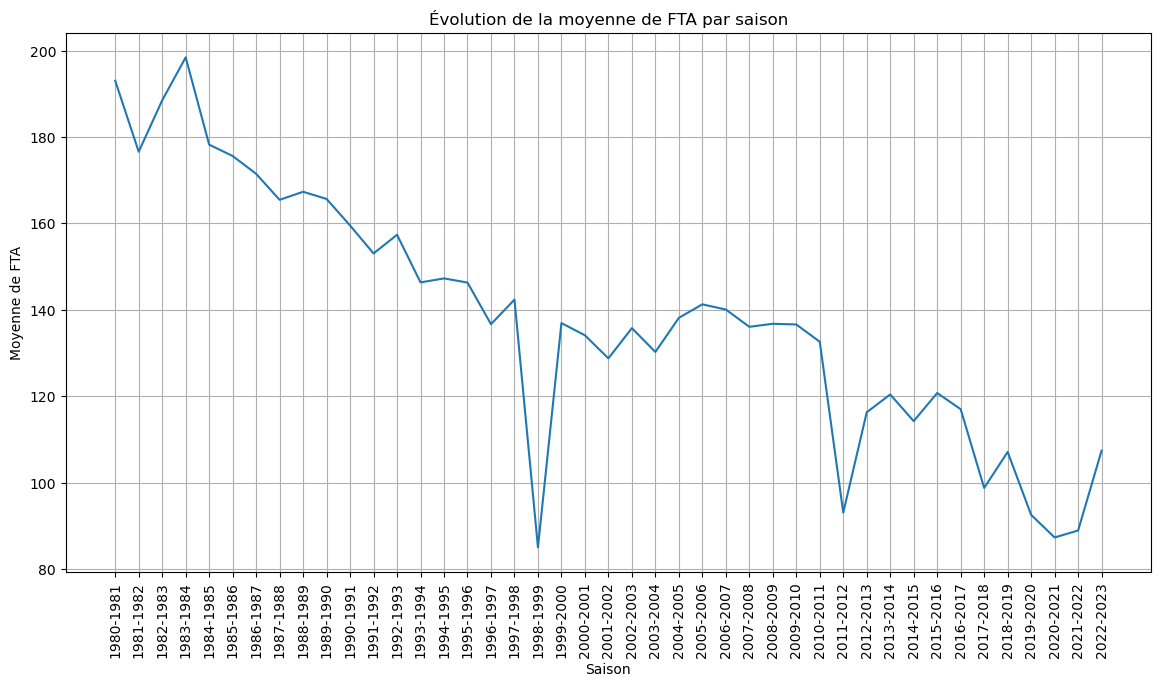

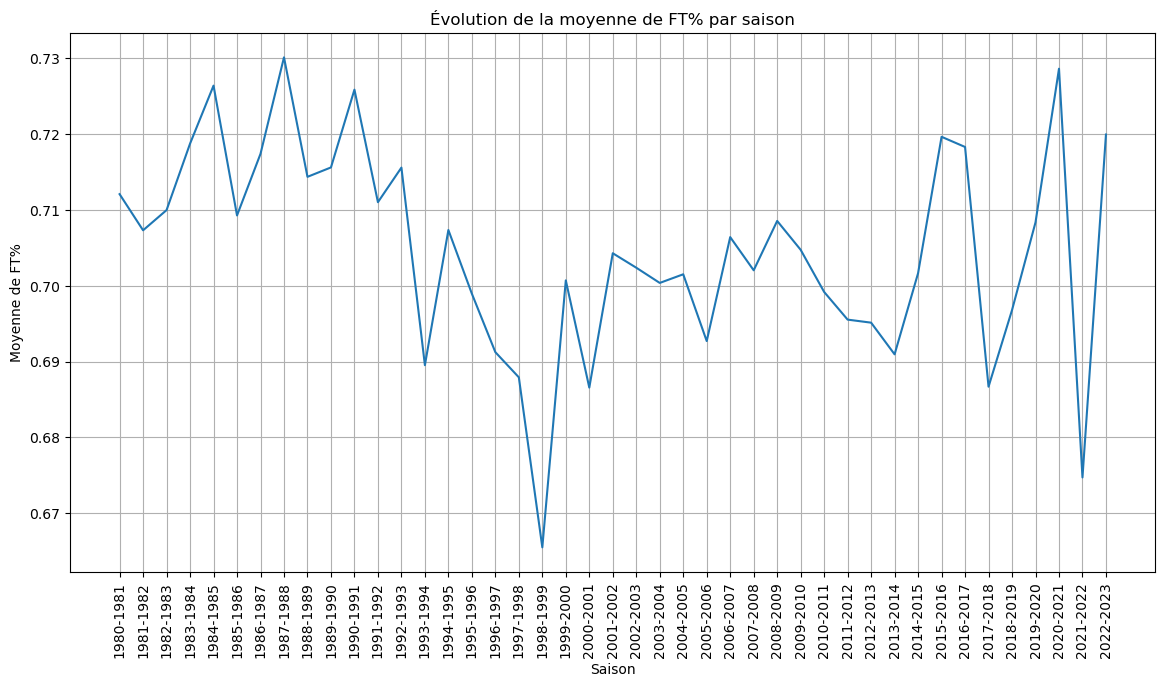

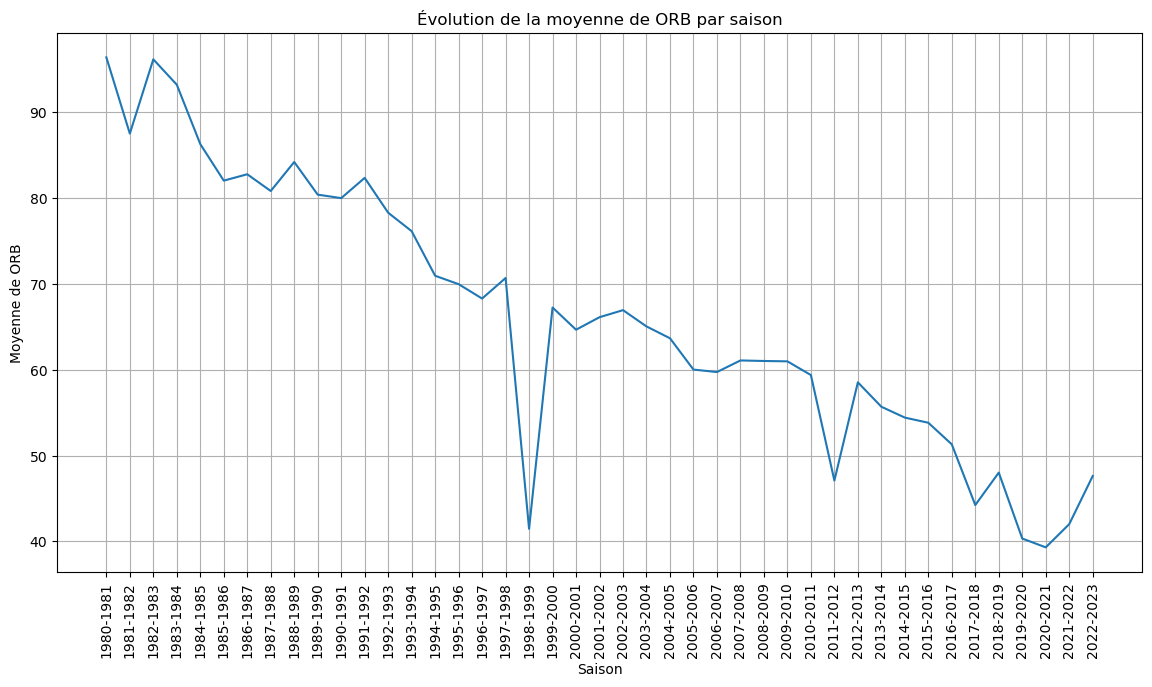

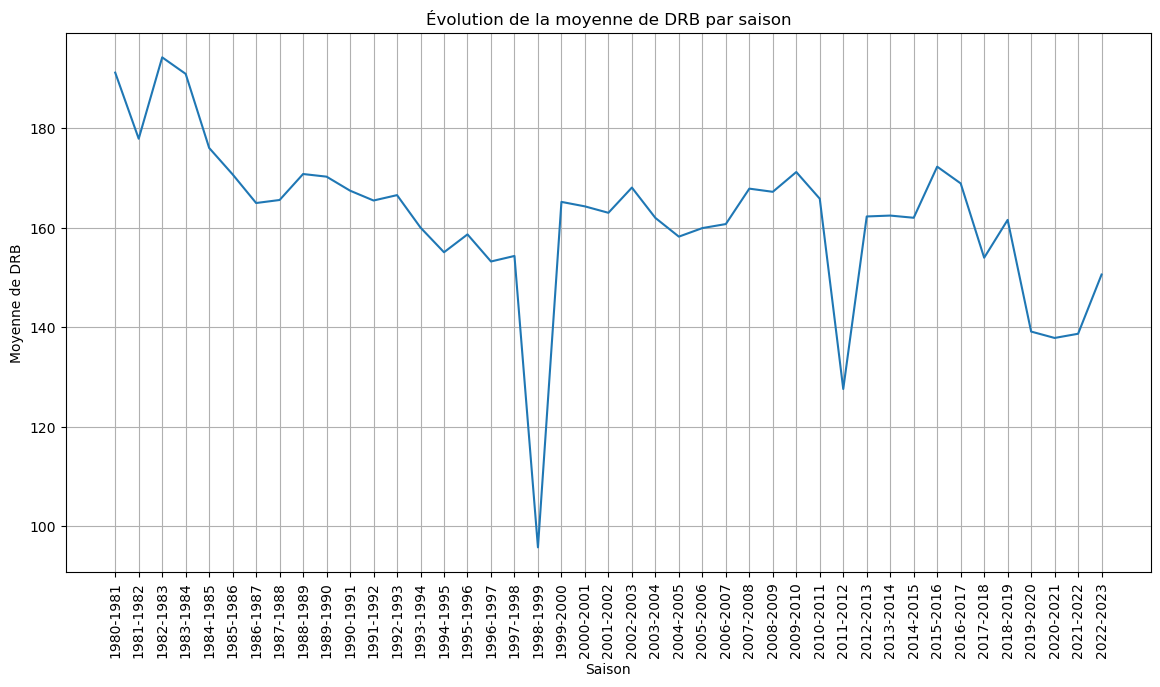

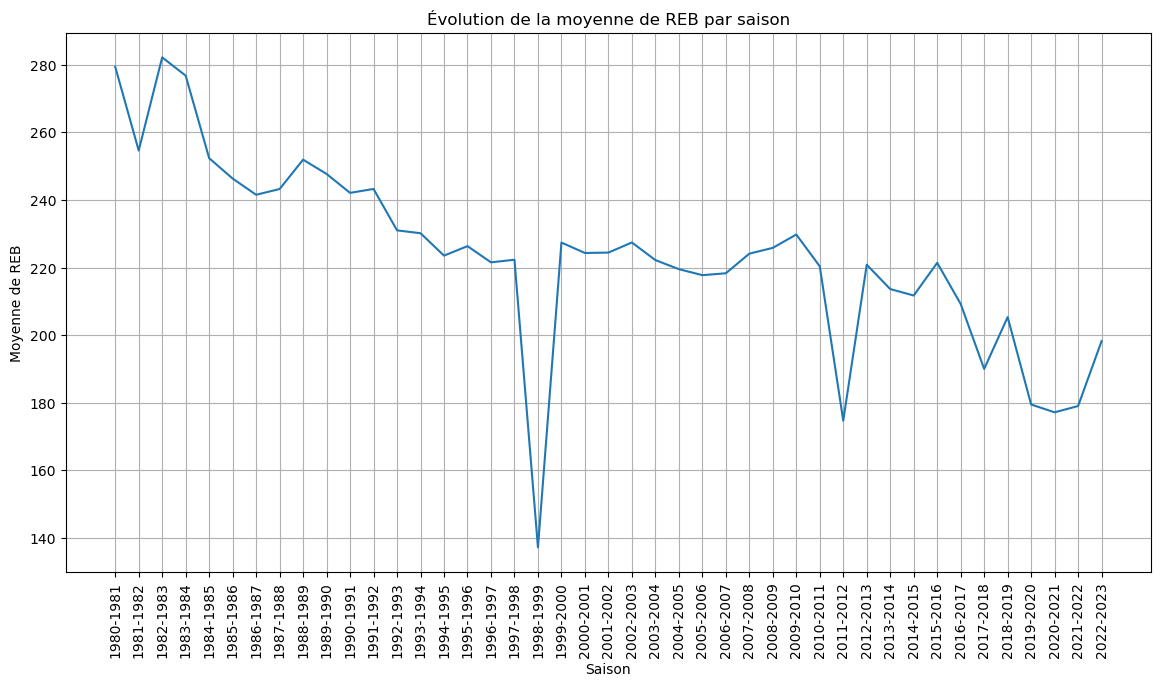

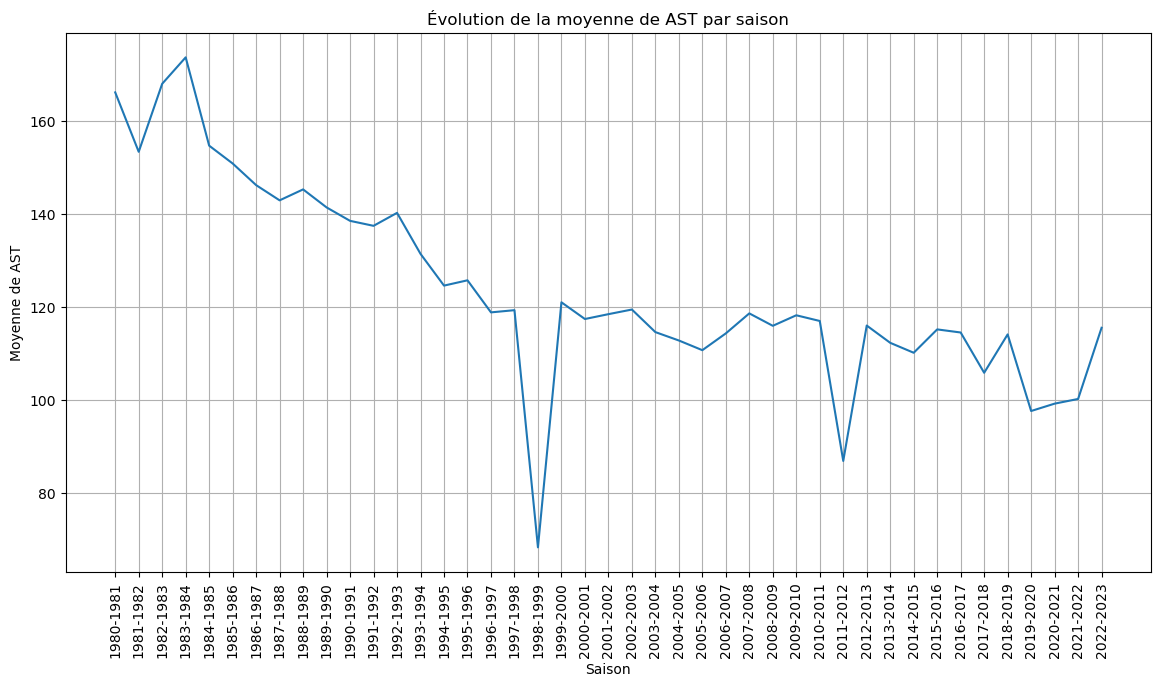

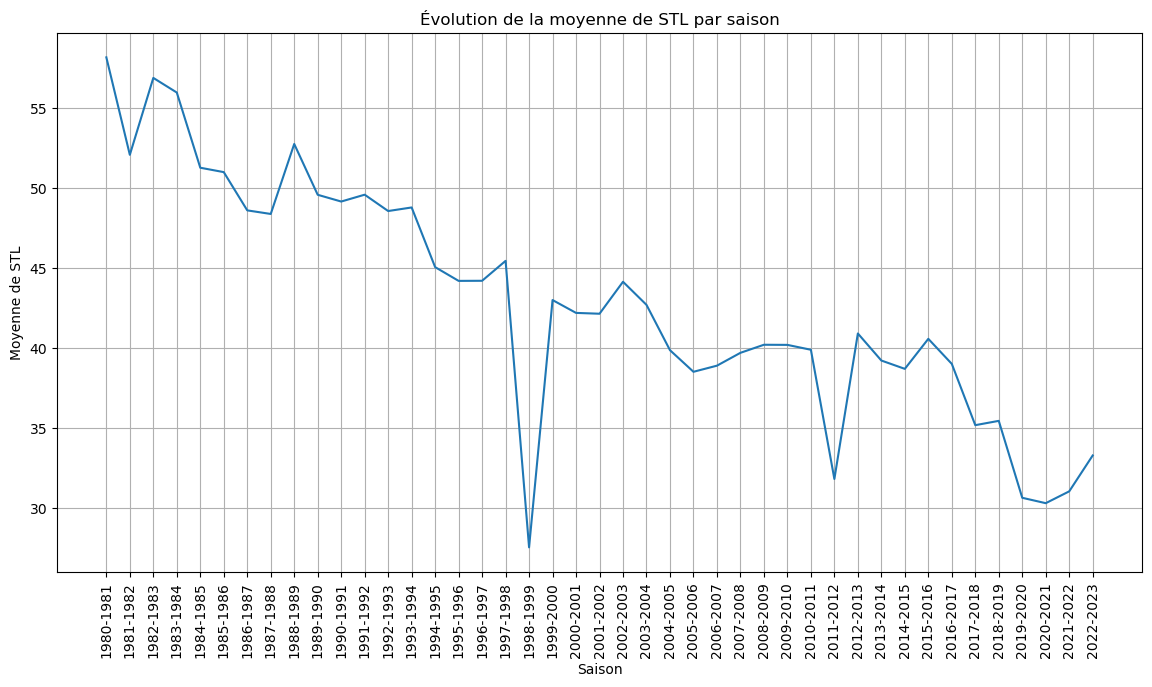

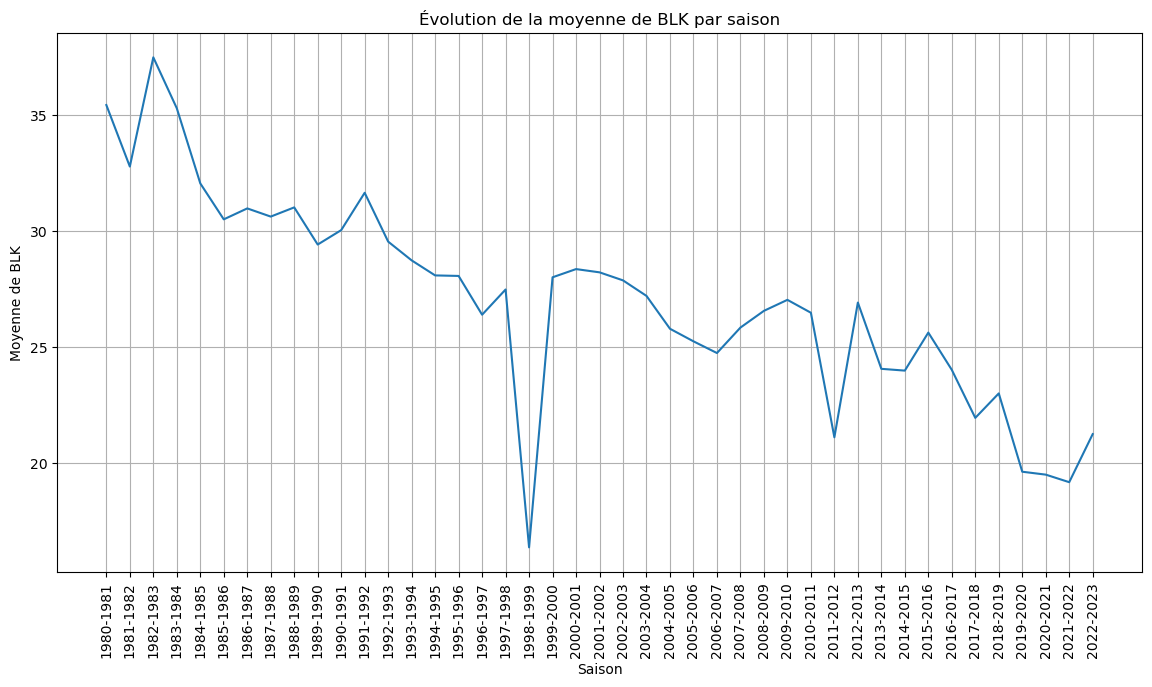

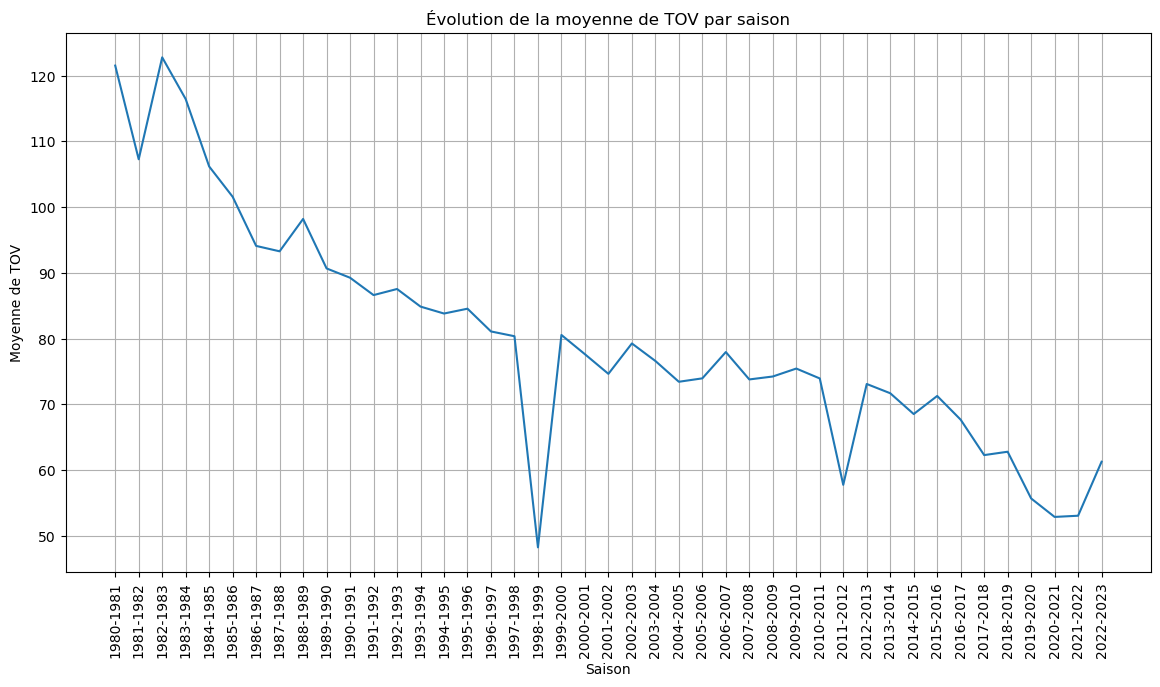

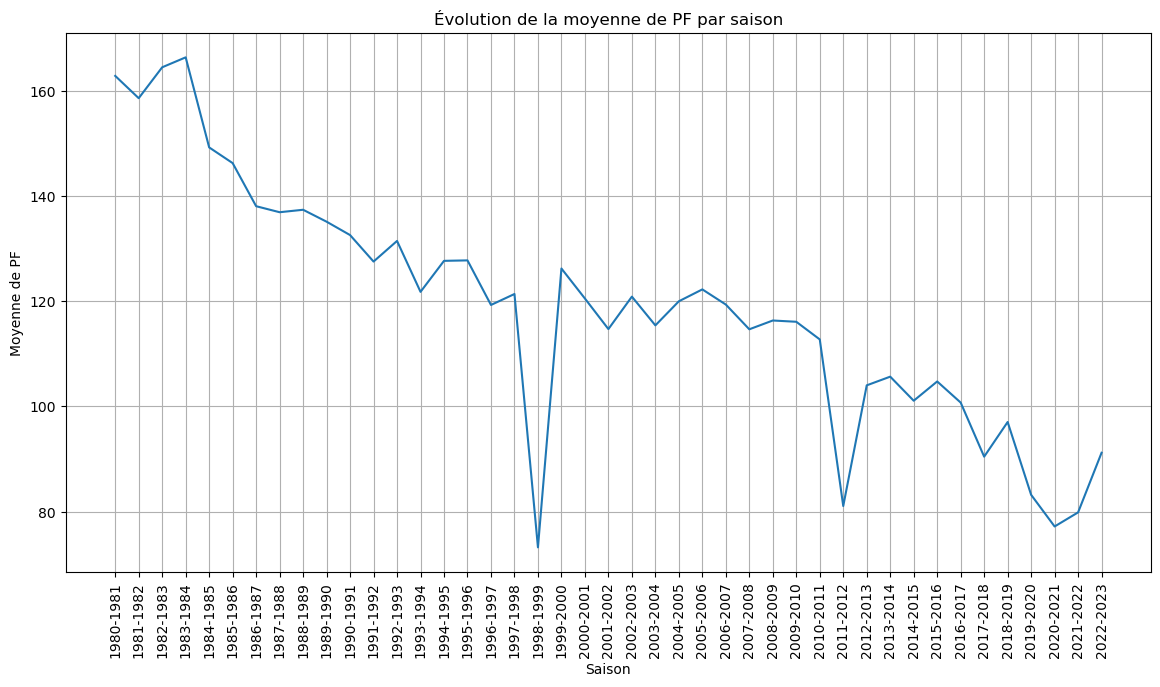

In [157]:
# Affichage des évolutions temporelles des statistiques de jeu des joueurs
game_stats_to_plot = ['GP', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA', '3P%', 'FTM', 'FTA', 'FT%', 'ORB', 'DRB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF']

for stat in game_stats_to_plot:
    seasonal_mean_game = merged_data.groupby('Season')[stat].mean()
    plt.figure(figsize=(14, 7))
    sns.lineplot(data=seasonal_mean_game)
    plt.title(f"Évolution de la moyenne de {stat} par saison")
    plt.xlabel("Saison")
    plt.ylabel(f"Moyenne de {stat}")
    plt.xticks(rotation=90)
    plt.grid(True)
    plt.show()

In [ ]:
# Affichage propre des résumés statistiques par saison pour les statistiques de jeu des joueurs
seasonal_game_summary_df = merged_data.groupby('Season').agg({
    'GP_y': ['mean', 'median', 'std', 'min', 'max'],
    'MIN': ['mean', 'median', 'std', 'min', 'max'],
    'PTS': ['mean', 'median', 'std', 'min', 'max'],
    'FGM': ['mean', 'median', 'std', 'min', 'max'],
    'FGA': ['mean', 'median', 'std', 'min', 'max'],
    'FG%': ['mean', 'median', 'std', 'min', 'max'],
    '3PM': ['mean', 'median', 'std', 'min', 'max'],
    '3PA': ['mean', 'median', 'std', 'min', 'max'],
    '3P%': ['mean', 'median', 'std', 'min', 'max'],
    'FTM': ['mean', 'median', 'std', 'min', 'max'],
    'FTA': ['mean', 'median', 'std', 'min', 'max'],
    'FT%': ['mean', 'median', 'std', 'min', 'max'],
    'ORB': ['mean', 'median', 'std', 'min', 'max'],
    'DRB': ['mean', 'median', 'std', 'min', 'max'],
    'REB': ['mean', 'median', 'std', 'min', 'max'],
    'AST': ['mean', 'median', 'std', 'min', 'max'],
    'STL': ['mean', 'median', 'std', 'min', 'max'],
    'BLK': ['mean', 'median', 'std', 'min', 'max'],
    'TOV': ['mean', 'median', 'std', 'min', 'max'],
    'PF': ['mean', 'median', 'std', 'min', 'max'],
})

print("Résumé statistique par saison pour les statistiques de jeu des joueurs:")
display(seasonal_game_summary_df)
